In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sas7bdat import SAS7BDAT
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import RandomForestRegressor

In [20]:
day = pd.read_csv('day.csv')

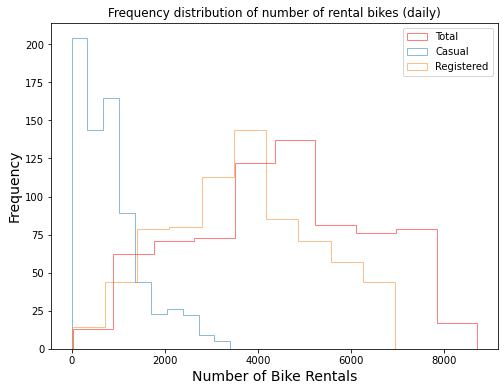

In [20]:
#Draw a histogram of cnt values
plt.figure(figsize=(8,6))
plt.hist(day['cnt'],histtype='step', bins=10, alpha=0.5, label="Total",color = 'red')
plt.hist(day['casual'],histtype='step', bins=10, alpha=0.5, label="Casual")
plt.hist(day['registered'],histtype='step', bins=10, alpha=0.5, label="Registered")
plt.xlabel("Number of Bike Rentals", size=14)
plt.ylabel("Frequency", size=14)
plt.title("Frequency distribution of number of rental bikes (daily)")
plt.legend(loc='upper right');

In [21]:
hour = pd.read_csv('hour.csv')

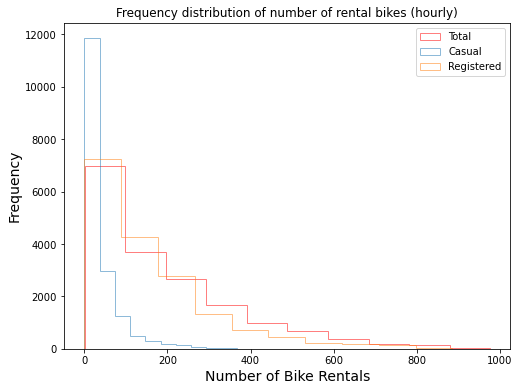

In [19]:
#Draw a histogram of cnt values
plt.figure(figsize=(8,6))
plt.hist(hour['cnt'],histtype='step', bins=10, alpha=0.5, label="Total",color = 'red')
plt.hist(hour['casual'],histtype='step', bins=10, alpha=0.5, label="Casual")
plt.hist(hour['registered'],histtype='step', bins=10, alpha=0.5, label="Registered")
plt.xlabel("Number of Bike Rentals", size=14)
plt.ylabel("Frequency", size=14)
plt.title("Frequency distribution of number of rental bikes (hourly)")
plt.legend(loc='upper right');

In [4]:
#Import packages and define target variable (Gradient Boosted Decision Tree)
from sklearn.ensemble import GradientBoostingRegressor
y = np.array(day.cnt)
#Drop unnecessary variables
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
#Define input variable
X=day.values
#Split the dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

C:\Users\hasib\AppData\Local\Temp/ipykernel_75268/2820739092.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


In [22]:
#Import packages and define target variable (RF)
y = np.array(day.cnt)
#Drop unnecessary variables
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
#Define input variable
X=day.values
#Split the dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

C:\Users\hasib\AppData\Local\Temp/ipykernel_75268/2660154069.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


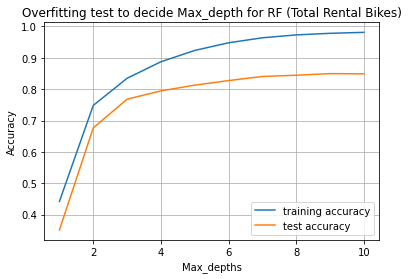

In [23]:
#Check overfitting with max_depth
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 11
depth_settings = range(1, 11)

for n_depth in depth_settings:
    # build the model
    tree = RandomForestRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for RF (Total Rental Bikes)");

Accuracy on training set: 0.965
Accuracy on test set: 0.862


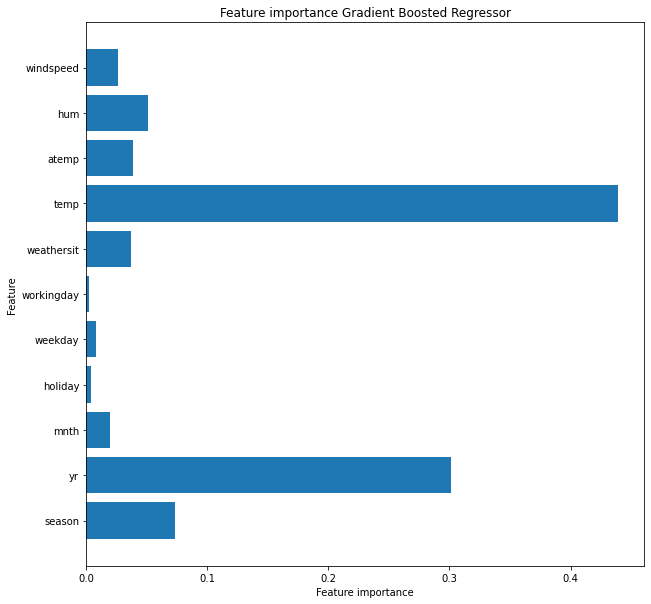

In [6]:
#Take max_depth = 3
#Fit a gradient boosted regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=6608)
GBR.fit(X_train, y_train)
#Check accuracy score
print("Accuracy on training set: {:.3f}".format(GBR.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(GBR.score(X_test, y_test)))
fig,ax=plt.subplots(figsize=(10,10))

def plot_feature_importances_GBR(model):
    n_features = len(day.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), day.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Feature importance Gradient Boosted Regressor")

plot_feature_importances_GBR(GBR)

Accuracy on training set: 0.948
Accuracy on test set: 0.827


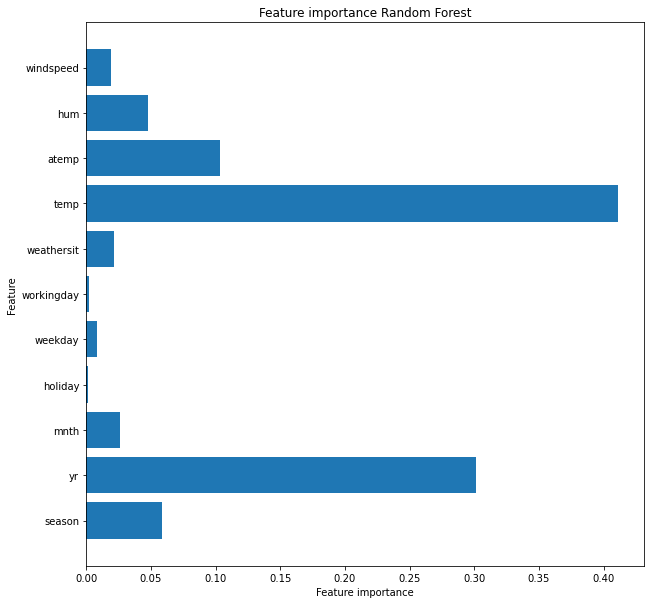

In [24]:
#Take max_depth = 6
#Fit a RF regressor
RF = RandomForestRegressor(n_estimators=100,max_depth=6, random_state=6608)
RF.fit(X_train, y_train)
#Check accuracy score
print("Accuracy on training set: {:.3f}".format(RF.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(RF.score(X_test, y_test)))
fig,ax=plt.subplots(figsize=(10,10))

def plot_feature_importances_RF(model):
    n_features = len(day.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), day.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Feature importance Random Forest")

plot_feature_importances_RF(RF)

C:\Users\hasib\AppData\Local\Temp/ipykernel_75268/187207924.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


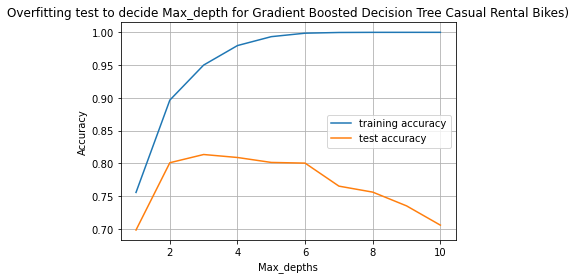

In [25]:
day = pd.read_csv('day.csv')
#Import packages and define target variable (Gradient Boosted Decision Tree)
from sklearn.ensemble import GradientBoostingRegressor
y = np.array(day.casual)
#Drop unnecessary variables
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
#Define input variable
X=day.values
#Split the dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)
#Check overfitting with max_depth
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 11
depth_settings = range(1, 11)

for n_depth in depth_settings:
    # build the model
    tree = GradientBoostingRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for Gradient Boosted Decision Tree Casual Rental Bikes)");

Accuracy on training set: 0.950
Accuracy on test set: 0.814


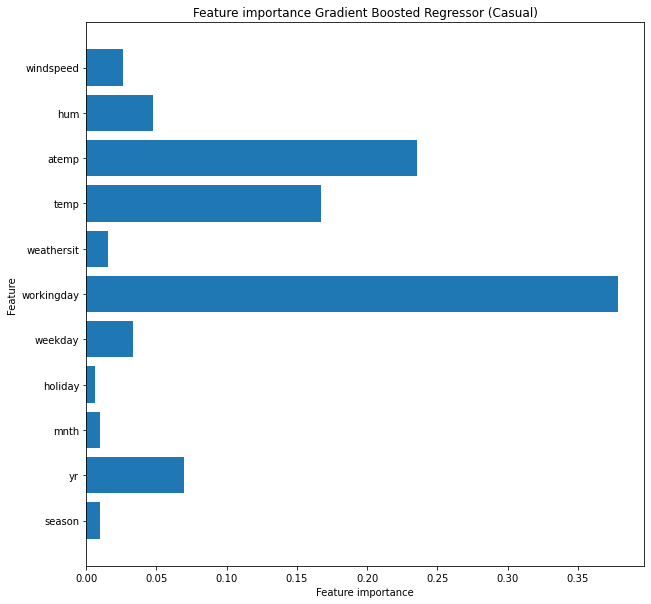

In [26]:
#Take max_depth = 3
#Fit a gradient boosted regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=6608)
GBR.fit(X_train, y_train)
#Check accuracy score
print("Accuracy on training set: {:.3f}".format(GBR.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(GBR.score(X_test, y_test)))
fig,ax=plt.subplots(figsize=(10,10))

def plot_feature_importances_GBR(model):
    n_features = len(day.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), day.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Feature importance Gradient Boosted Regressor (Casual)")

plot_feature_importances_GBR(GBR)

Accuracy on training set: 0.929
Accuracy on test set: 0.786


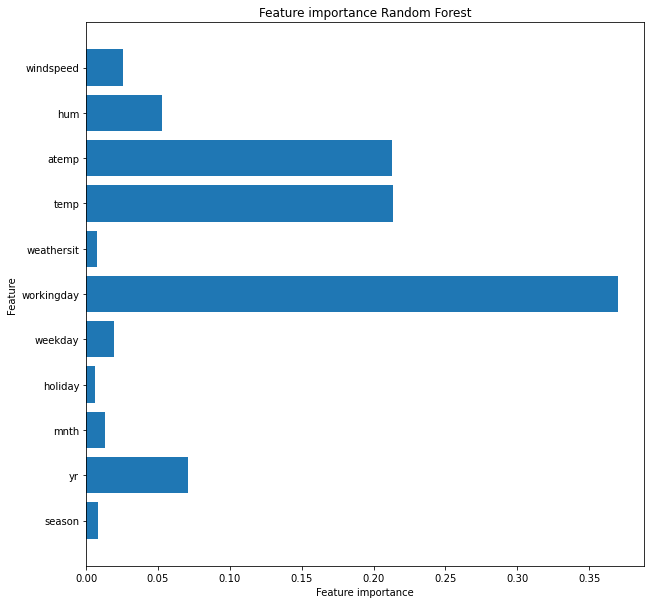

In [27]:
#Take max_depth = 6
#Fit a RF regressor
RF = RandomForestRegressor(n_estimators=100,max_depth=6, random_state=6608)
RF.fit(X_train, y_train)
#Check accuracy score
print("Accuracy on training set: {:.3f}".format(RF.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(RF.score(X_test, y_test)))
fig,ax=plt.subplots(figsize=(10,10))

def plot_feature_importances_RF(model):
    n_features = len(day.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), day.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Feature importance Random Forest")

plot_feature_importances_RF(RF)

C:\Users\hasib\AppData\Local\Temp/ipykernel_75268/22771679.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


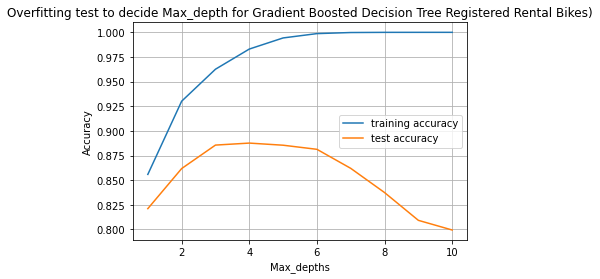

In [28]:
day = pd.read_csv('day.csv')
#Import packages and define target variable (Gradient Boosted Decision Tree)
from sklearn.ensemble import GradientBoostingRegressor
y = np.array(day.registered)
#Drop unnecessary variables
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
#Define input variable
X=day.values
#Split the dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)
#Check overfitting with max_depth
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 11
depth_settings = range(1, 11)

for n_depth in depth_settings:
    # build the model
    tree = GradientBoostingRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for Gradient Boosted Decision Tree Registered Rental Bikes)");

Accuracy on training set: 0.963
Accuracy on test set: 0.886


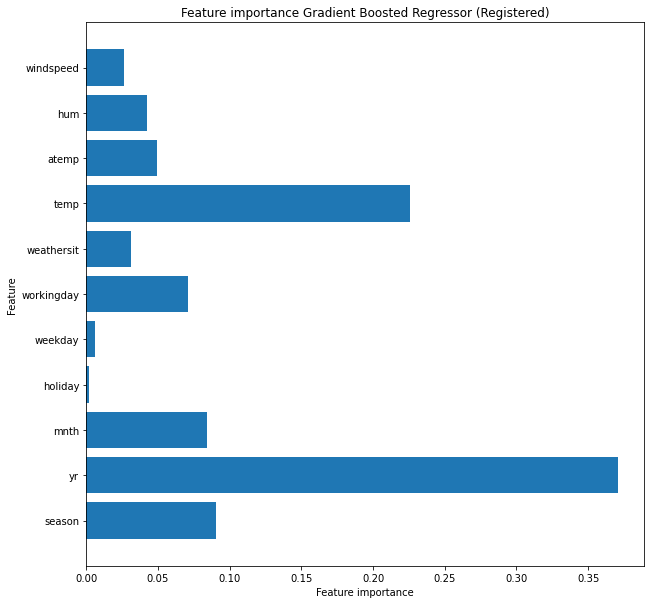

In [29]:
#Take max_depth = 3
#Fit a gradient boosted regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=6608)
GBR.fit(X_train, y_train)
#Check accuracy score
print("Accuracy on training set: {:.3f}".format(GBR.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(GBR.score(X_test, y_test)))
fig,ax=plt.subplots(figsize=(10,10))

def plot_feature_importances_GBR(model):
    n_features = len(day.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), day.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Feature importance Gradient Boosted Regressor (Registered)")

plot_feature_importances_GBR(GBR)

Accuracy on training set: 0.940
Accuracy on test set: 0.831


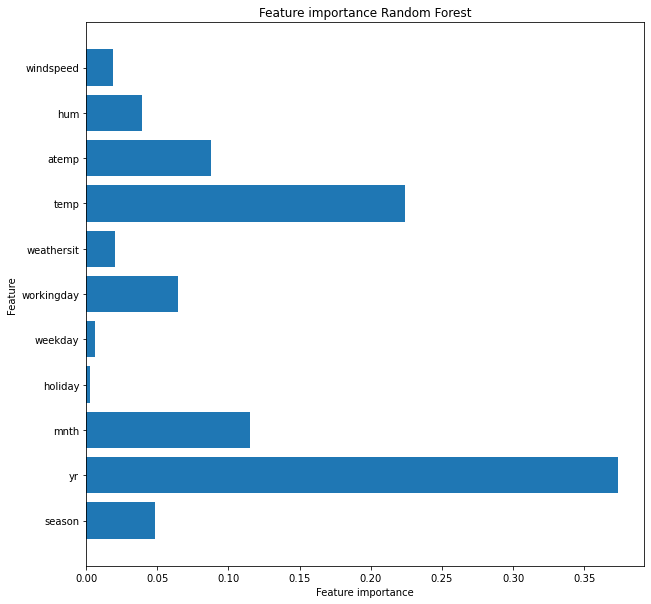

In [30]:
#Take max_depth = 6
#Fit a RF regressor
RF = RandomForestRegressor(n_estimators=100,max_depth=6, random_state=6608)
RF.fit(X_train, y_train)
#Check accuracy score
print("Accuracy on training set: {:.3f}".format(RF.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(RF.score(X_test, y_test)))
fig,ax=plt.subplots(figsize=(10,10))

def plot_feature_importances_RF(model):
    n_features = len(day.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), day.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Feature importance Random Forest")

plot_feature_importances_RF(RF)

In [11]:
#OLS Total
import statsmodels.api as sm
day = pd.read_csv('day.csv')
y = day['cnt']
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X = day
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)
model = sm.OLS(y_train, X_train).fit()
model.summary()

C:\Users\hasib\AppData\Local\Temp/ipykernel_75268/1003512585.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
E:\Python\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     194.4
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          5.26e-179
Time:                        00:15:34   Log-Likelihood:                -4479.6
No. Observations:                 548   AIC:                             8983.
Df Residuals:                     536   BIC:                             9035.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1522.4788    280.735      5.423      0.000     971.004    2073.954
season       551.9622     63.956      8.630      0.000     426.327     677.598
yr          2034.4883     75.005     27.125      0.000    1887.148    2181.828
mnth         -45.1323     19.817     -2.277      0.023     -84.061      -6.204
holiday     -372.2502    236.515     -1.574      0.116    -836.860      92.360
weekday       60.4616     18.723      3.229      0.001      23.682      97.241
workingday   206.7145     82.975      2.491      0.013      43.718     369.711
weathersit  -617.4206     89.681     -6.885      0.000    -793.590    -441.251
temp        3122.8685   1454.339      2.147      0.032     265.965    5979.772
atemp       2105.1771   1644.340      1.280      0.201   -1124.965    5335.319
hum         -915.7387    351.789     -2.603      0.009   -1606.792    -224.685
windspeed  -3060.4395    523.922     -5.841      0.000   -4089.631   -2031.248
==============================================================================
Omnibus:                       77.287   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.464
Skew:                          -0.775   Prob(JB):                     4.32e-37
Kurtosis:                       5.220   Cond. No.                         507.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#OLS Casual
import statsmodels.api as sm
day = pd.read_csv('day.csv')
y = day['casual']
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X = day
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)
model = sm.OLS(y_train, X_train).fit()
model.summary()

C:\Users\hasib\AppData\Local\Temp/ipykernel_75268/72828861.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
E:\Python\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     100.7
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          1.06e-122
Time:                        00:15:45   Log-Likelihood:                -4028.3
No. Observations:                 548   AIC:                             8081.
Df Residuals:                     536   BIC:                             8132.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.0037    123.207      5.560      0.000     442.975     927.032
season        64.8876     28.069      2.312      0.021       9.749     120.026
yr           284.5879     32.918      8.645      0.000     219.924     349.252
mnth         -14.3138      8.697     -1.646      0.100     -31.399       2.771
holiday     -158.1235    103.800     -1.523      0.128    -362.029      45.782
weekday       18.9451      8.217      2.306      0.022       2.804      35.087
workingday  -771.8370     36.416    -21.195      0.000    -843.372    -700.302
weathersit  -119.8377     39.359     -3.045      0.002    -197.154     -42.521
temp        1649.2947    638.273      2.584      0.010     395.472    2903.118
atemp        331.1259    721.660      0.459      0.647   -1086.502    1748.754
hum         -345.7513    154.391     -2.239      0.026    -649.037     -42.465
windspeed   -964.3685    229.936     -4.194      0.000   -1416.055    -512.682
==============================================================================
Omnibus:                       76.800   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.223
Skew:                           0.729   Prob(JB):                     1.34e-41
Kurtosis:                       5.473   Cond. No.                         507.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#OLS Registered
import statsmodels.api as sm
day = pd.read_csv('day.csv')
y = day['registered']
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X = day
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)
model = sm.OLS(y_train, X_train).fit()
model.summary()

C:\Users\hasib\AppData\Local\Temp/ipykernel_75268/3917342866.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
E:\Python\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          7.85e-189
Time:                        00:15:52   Log-Likelihood:                -4345.2
No. Observations:                 548   AIC:                             8714.
Df Residuals:                     536   BIC:                             8766.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        837.4751    219.671      3.812      0.000     405.953    1268.997
season       487.0747     50.045      9.733      0.000     388.767     585.383
yr          1749.9004     58.691     29.816      0.000    1634.609    1865.192
mnth         -30.8184     15.507     -1.987      0.047     -61.280      -0.357
holiday     -214.1267    185.070     -1.157      0.248    -577.678     149.424
weekday       41.5165     14.650      2.834      0.005      12.737      70.296
workingday   978.5515     64.927     15.072      0.000     851.009    1106.094
weathersit  -497.5829     70.174     -7.091      0.000    -635.433    -359.732
temp        1473.5737   1138.001      1.295      0.196    -761.916    3709.063
atemp       1774.0512   1286.675      1.379      0.169    -753.492    4301.595
hum         -569.9873    275.270     -2.071      0.039   -1110.728     -29.247
windspeed  -2096.0710    409.962     -5.113      0.000   -2901.400   -1290.742
==============================================================================
Omnibus:                      143.727   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              502.127
Skew:                          -1.188   Prob(JB):                    9.21e-110
Kurtosis:                       7.043   Cond. No.                         507.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

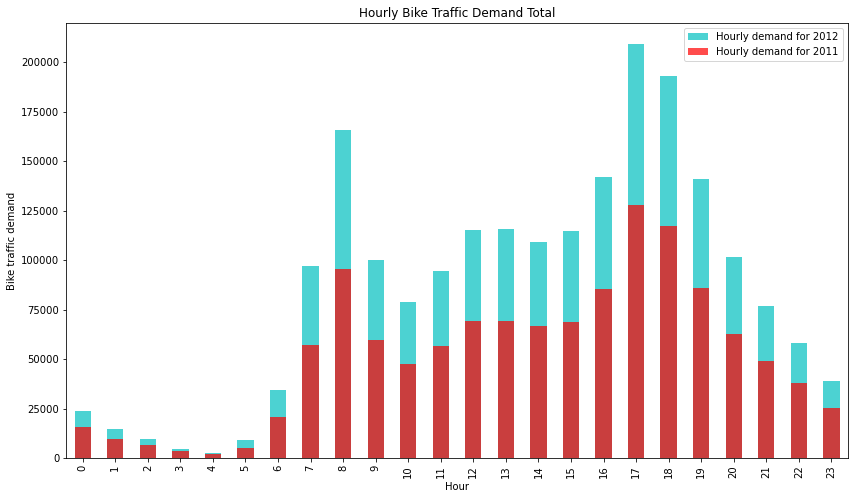

In [14]:
hour = pd.read_csv('hour.csv')
#Sort the dataset to get 2012 data
hour_2012 = hour[hour['dteday'] >= "2012-01-01"]
hour_2011 = hour[hour['dteday'] < "2012-01-01"]
#Plot hourly demand
hourly_demand_2011 = hour_2011.groupby('hr')['cnt'].sum()
hourly_demand_2012 = hour_2012.groupby('hr')['cnt'].sum()
hourly_demand_2012.plot(kind='bar',figsize=[14, 8],linewidth='4',alpha=0.7, color='c',label='Hourly demand for 2012');
hourly_demand_2011.plot(kind='bar',figsize=[14, 8],linewidth='4',alpha=0.7, color='r',label='Hourly demand for 2011');
plt.xlabel("Hour");
plt.ylabel("Bike traffic demand")
plt.title("Hourly Bike Traffic Demand Total");
plt.legend(loc='upper right');

In [40]:
#Do OLS for Total, Casual and Registered with hour data

In [32]:
#RMSE and R2 check for different models 
day = pd.read_csv('day.csv')
y = np.array(day.cnt)
#Drop unnecessary variables
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X = day.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
#Check Accuracy
print('RMSE_LR=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_LR=',(r2_score(y_test,y_pred)))
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Check Accuracy
print('RMSE_Ridge=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Ridge=',(r2_score(y_test,y_pred)))
cld = linear_model.Lasso(alpha=0.1)
cld.fit(X_train, y_train)
y_pred = cld.predict(X_test)
#Check Accuracy
print('RMSE_Lasso=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Lasso=',(r2_score(y_test,y_pred)))
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
#Check Accuracy
print('RMSE_Elastic=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Elastic=',(r2_score(y_test,y_pred)))
#Fit a GBDT regressor with max_depth = 3
GBDT = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=6608)
GBDT.fit(X_train, y_train)
y_pred = GBDT.predict(X_test)
#Check Accuracy
print('RMSE_GBDT=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_GBDT=',(r2_score(y_test,y_pred)))
forest = RandomForestRegressor(n_estimators=100,max_depth=6, random_state=6608)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
#Get the accuracy score
print('RMSE_RF=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_RF=',(r2_score(y_test,y_pred)))

C:\Users\hasib\AppData\Local\Temp/ipykernel_75268/1966034744.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


RMSE_LR= 881.0898652570455
R2_LR= 0.790462488187492
RMSE_Ridge= 887.4951971339274
R2_Ridge= 0.7874048298193316
RMSE_Lasso= 881.2426596108113
R2_Lasso= 0.7903898079172661
RMSE_Elastic= 1499.0930060490434
R2_Elastic= 0.3934333521572039
RMSE_GBDT= 715.9990847028512
R2_GBDT= 0.8616286095112616
RMSE_RF= 799.5328380624286
R2_RF= 0.8274583359852354


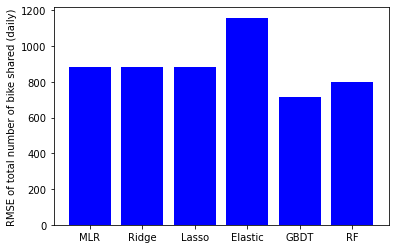

In [33]:
Model = ['MLR','Ridge','Lasso','Elastic','GBDT','RF']
RMSE = [881.0898652570436,881.3284794660311,881.1505496278149,1158.1004428237704,715.9990847028512,799.5328380624286]
plt.bar(Model,RMSE, color ='blue')
plt.ylabel("RMSE of total number of bike shared (daily)");

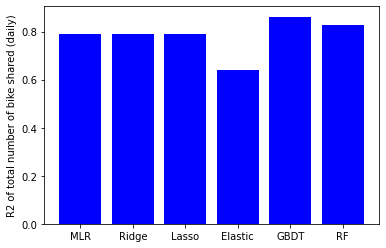

In [35]:
Model = ['MLR','Ridge','Lasso','Elastic','GBDT','RF']
RMSE = [0.7904624881874929,0.790348980133779,0.7904336237312122,0.6379956191342346,0.8616286095112616,0.8274583359852354]
plt.bar(Model,RMSE, color ='blue')
plt.ylabel("R2 of total number of bike shared (daily)");

In [73]:
#RMSE and R2 check for different models 
day = pd.read_csv('day.csv')
y = np.array(day.cnt)
#Drop unnecessary variables
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X = day.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)
reg = LinearRegression().fit(X_train, y_train)
y_pred_lin = reg.predict(X_test)
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred_ridge = clf.predict(X_test)
cld = linear_model.Lasso(alpha=0.1)
cld.fit(X_train, y_train)
y_pred_lasso = cld.predict(X_test)
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred_elast = regr.predict(X_test)
GBDT = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=6608)
GBDT.fit(X_train, y_train)
y_pred_GBDT = GBDT.predict(X_test)
forest = RandomForestRegressor(n_estimators=100,max_depth=6, random_state=6608)
forest.fit(X_train, y_train)
y_pred_RF = forest.predict(X_test)

C:\Users\hasib\AppData\Local\Temp/ipykernel_75268/2971066467.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


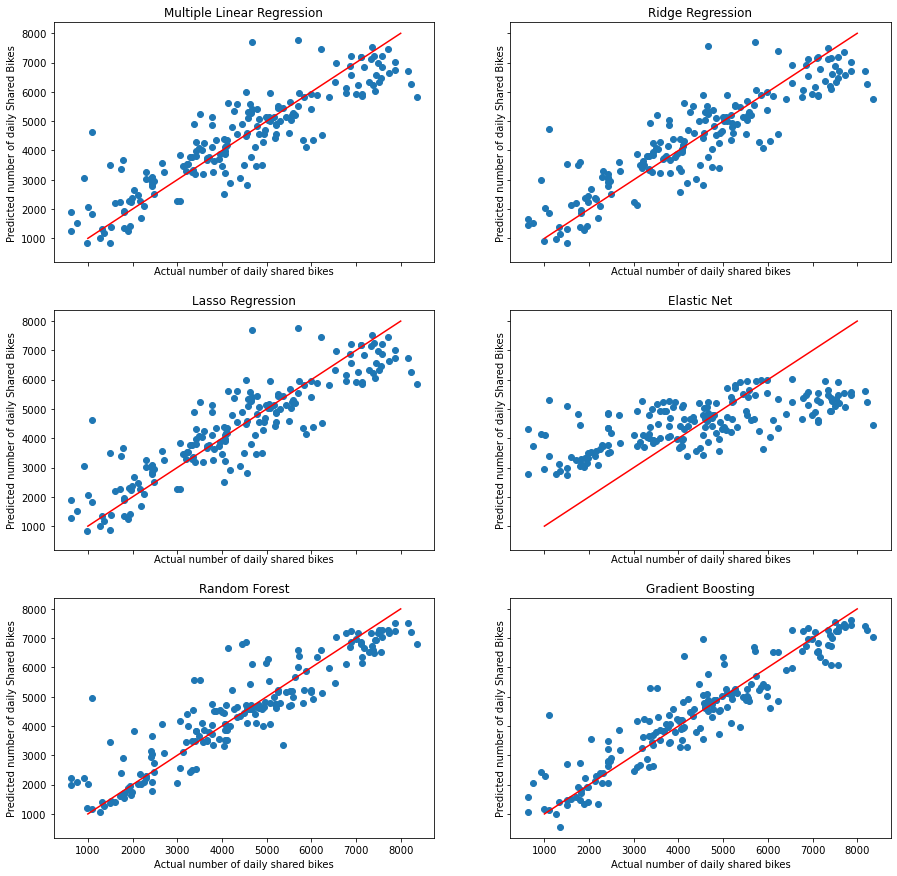

In [74]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True,figsize=(15, 15))
axs[0,0].scatter(y_test,y_pred_lin)
x_45 = [1000,8000]
y_45 = [1000,8000]
axs[0, 0].plot(x_45,y_45,'r');
axs[0, 0].set_title('Multiple Linear Regression')
axs[0, 1].scatter(y_test,y_pred_ridge)
axs[0, 1].plot(x_45,y_45,'r');
axs[0, 1].set_title('Ridge Regression')
axs[1, 0].scatter(y_test,y_pred_lasso)
axs[1, 0].plot(x_45,y_45,'r');
axs[1, 0].set_title('Lasso Regression')
axs[1, 1].scatter(y_test, y_pred_elast)
axs[1, 1].plot(x_45,y_45,'r');
axs[1, 1].set_title('Elastic Net')
axs[2, 0].scatter(y_test, y_pred_RF)
axs[2, 0].plot(x_45,y_45,'r');
axs[2, 0].set_title('Random Forest')
axs[2, 1].plot(x_45,y_45,'r');
axs[2, 1].scatter(y_test, y_pred_GBDT)
axs[2, 1].set_title('Gradient Boosting')

for ax in axs.flat:
    ax.set(xlabel='Actual number of daily shared bikes', ylabel='Predicted number of daily Shared Bikes')

In [62]:
#RMSE and R2 check for different models 
hour = pd.read_csv('hour.csv')
y = np.array(hour.cnt)
#Drop unnecessary variables
hour.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X = hour.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
#Check Accuracy
print('RMSE_LR=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_LR=',(r2_score(y_test,y_pred)))
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Check Accuracy
print('RMSE_Ridge=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Ridge=',(r2_score(y_test,y_pred)))
cld = linear_model.Lasso(alpha=0.1)
cld.fit(X_train, y_train)
y_pred = cld.predict(X_test)
#Check Accuracy
print('RMSE_Lasso=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Lasso=',(r2_score(y_test,y_pred)))
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
#Check Accuracy
print('RMSE_Elastic=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Elastic=',(r2_score(y_test,y_pred)))
#Fit a GBDT regressor with max_depth = 3
GBDT = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=6608)
GBDT.fit(X_train, y_train)
y_pred = GBDT.predict(X_test)
#Check Accuracy
print('RMSE_GBDT=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_GBDT=',(r2_score(y_test,y_pred)))
forest = RandomForestRegressor(n_estimators=100,max_depth=6, random_state=6608)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
#Get the accuracy score
print('RMSE_RF=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_RF=',(r2_score(y_test,y_pred)))

C:\Users\hasib\AppData\Local\Temp/ipykernel_75268/1032715818.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  hour.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


RMSE_LR= 138.70867044124864
R2_LR= 0.3911297680928364
RMSE_Ridge= 138.7138036617539
R2_Ridge= 0.3910847020853271
RMSE_Lasso= 138.7461310420862
R2_Lasso= 0.39080085246593066
RMSE_Elastic= 153.86810080590132
R2_Elastic= 0.2507707733580564
RMSE_GBDT= 68.0833738017307
R2_GBDT= 0.8533102862768414
RMSE_RF= 95.32593116697024
R2_RF= 0.7124326096296474


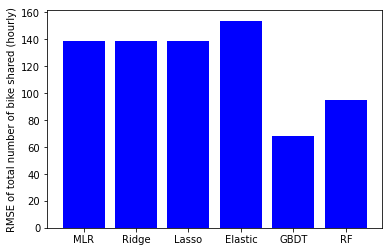

In [63]:
Model = ['MLR','Ridge','Lasso','Elastic','GBDT','RF']
RMSE = [138.70867044124864,138.7138036617539,138.7461310420862,153.86810080590132,68.0833738017307,95.32593116697024]
plt.bar(Model,RMSE, color ='blue')
plt.ylabel("RMSE of total number of bike shared (hourly)");

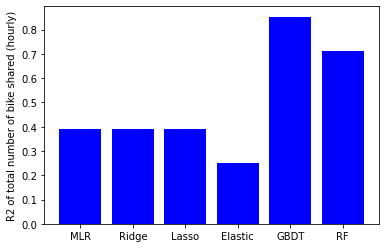

In [64]:
Model = ['MLR','Ridge','Lasso','Elastic','GBDT','RF']
RMSE = [0.3911297680928364,0.3910847020853271,0.39080085246593066,0.2507707733580564,0.8533102862768414,0.7124326096296474]
plt.bar(Model,RMSE, color ='blue')
plt.ylabel("R2 of total number of bike shared (hourly)");

In [65]:
#Event specific
#RMSE and R2 check for different models 
hour = pd.read_csv('hr_event.csv')
y = np.array(hour.cnt)
#Drop unnecessary variables
hour.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X = hour.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
#Check Accuracy
print('RMSE_LR=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_LR=',(r2_score(y_test,y_pred)))
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Check Accuracy
print('RMSE_Ridge=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Ridge=',(r2_score(y_test,y_pred)))
cld = linear_model.Lasso(alpha=0.1)
cld.fit(X_train, y_train)
y_pred = cld.predict(X_test)
#Check Accuracy
print('RMSE_Lasso=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Lasso=',(r2_score(y_test,y_pred)))
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
#Check Accuracy
print('RMSE_Elastic=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Elastic=',(r2_score(y_test,y_pred)))
#Fit a GBDT regressor with max_depth = 3
GBDT = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=6608)
GBDT.fit(X_train, y_train)
y_pred = GBDT.predict(X_test)
#Check Accuracy
print('RMSE_GBDT=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_GBDT=',(r2_score(y_test,y_pred)))
forest = RandomForestRegressor(n_estimators=100,max_depth=6, random_state=6608)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
#Get the accuracy score
print('RMSE_RF=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_RF=',(r2_score(y_test,y_pred)))

C:\Users\hasib\AppData\Local\Temp/ipykernel_75268/3305344567.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  hour.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


RMSE_LR= 164.13268874051977
R2_LR= 0.3967377548694361
RMSE_Ridge= 162.0496667141036
R2_Ridge= 0.41195269700560166
RMSE_Lasso= 164.04604287361968
R2_Lasso= 0.3973745126518041
RMSE_Elastic= 187.3971072065356
R2_Elastic= 0.21360318983578475
RMSE_GBDT= 118.64938869699752
R2_GBDT= 0.6847558848058173
RMSE_RF= 127.77747746381354
R2_RF= 0.6343845004167235


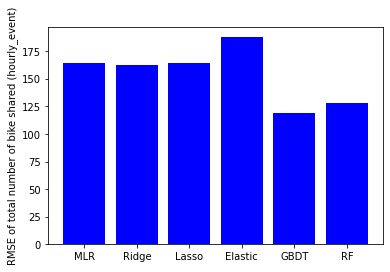

In [67]:
Model = ['MLR','Ridge','Lasso','Elastic','GBDT','RF']
RMSE = [164.13268874051977,162.0496667141036,164.04604287361968,187.3971072065356,118.64938869699752,127.77747746381354]
plt.bar(Model,RMSE, color ='blue')
plt.ylabel("RMSE of total number of bike shared (hourly_event)");

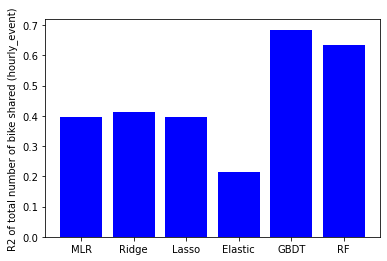

In [68]:
Model = ['MLR','Ridge','Lasso','Elastic','GBDT','RF']
RMSE = [0.3967377548694361,0.41195269700560166,0.3973745126518041,0.21360318983578475,0.6847558848058173,0.6343845004167235]
plt.bar(Model,RMSE, color ='blue')
plt.ylabel("R2 of total number of bike shared (hourly_event)");

C:\Users\hasib\AppData\Local\Temp/ipykernel_75268/1802666152.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  hour.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


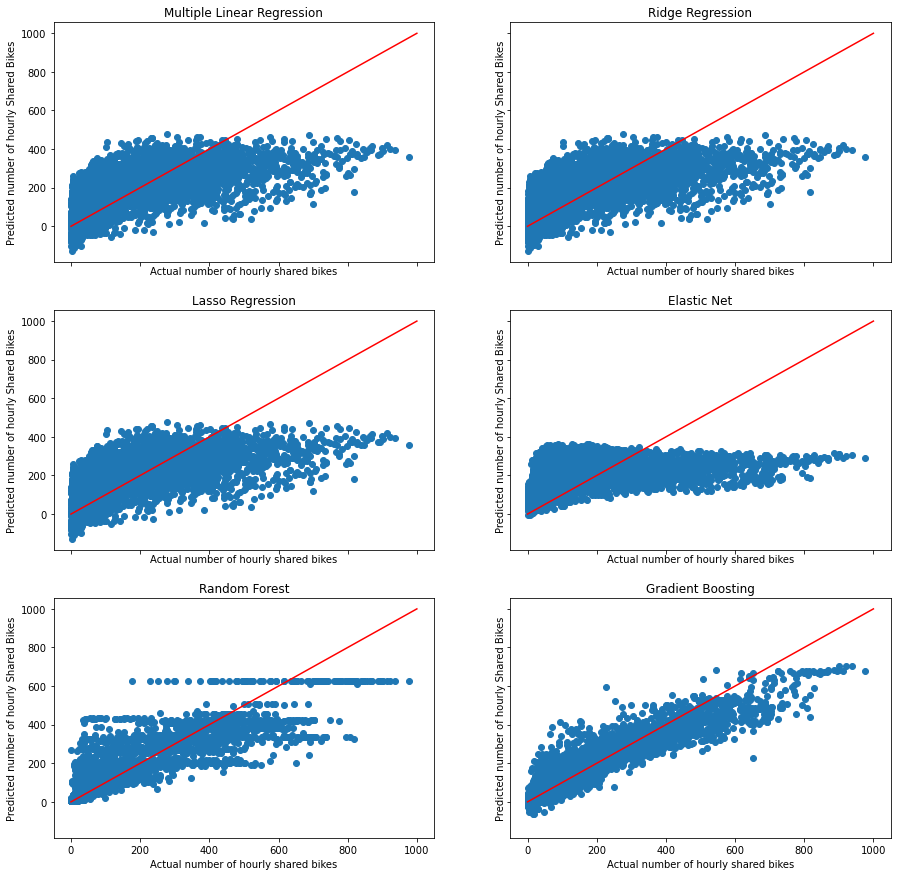

In [72]:
#RMSE and R2 check for different models 
hour = pd.read_csv('hour.csv')
y = np.array(hour.cnt)
#Drop unnecessary variables
hour.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X = hour.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)
reg = LinearRegression().fit(X_train, y_train)
y_pred_lin = reg.predict(X_test)
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred_ridge = clf.predict(X_test)
cld = linear_model.Lasso(alpha=0.1)
cld.fit(X_train, y_train)
y_pred_lasso = cld.predict(X_test)
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred_elast = regr.predict(X_test)
GBDT = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=6608)
GBDT.fit(X_train, y_train)
y_pred_GBDT = GBDT.predict(X_test)
forest = RandomForestRegressor(n_estimators=100,max_depth=6, random_state=6608)
forest.fit(X_train, y_train)
y_pred_RF = forest.predict(X_test)
fig, axs = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True,figsize=(15, 15))
axs[0,0].scatter(y_test,y_pred_lin)
x_45 = [0,1000]
y_45 = [0,1000]
axs[0, 0].plot(x_45,y_45,'r');
axs[0, 0].set_title('Multiple Linear Regression')
axs[0, 1].scatter(y_test,y_pred_ridge)
axs[0, 1].plot(x_45,y_45,'r');
axs[0, 1].set_title('Ridge Regression')
axs[1, 0].scatter(y_test,y_pred_lasso)
axs[1, 0].plot(x_45,y_45,'r');
axs[1, 0].set_title('Lasso Regression')
axs[1, 1].scatter(y_test, y_pred_elast)
axs[1, 1].plot(x_45,y_45,'r');
axs[1, 1].set_title('Elastic Net')
axs[2, 0].scatter(y_test, y_pred_RF)
axs[2, 0].plot(x_45,y_45,'r');
axs[2, 0].set_title('Random Forest')
axs[2, 1].plot(x_45,y_45,'r');
axs[2, 1].scatter(y_test, y_pred_GBDT)
axs[2, 1].set_title('Gradient Boosting')

for ax in axs.flat:
    ax.set(xlabel='Actual number of hourly shared bikes', ylabel='Predicted number of hourly Shared Bikes')

C:\Users\hasib\AppData\Local\Temp/ipykernel_75268/2796941470.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  hour.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


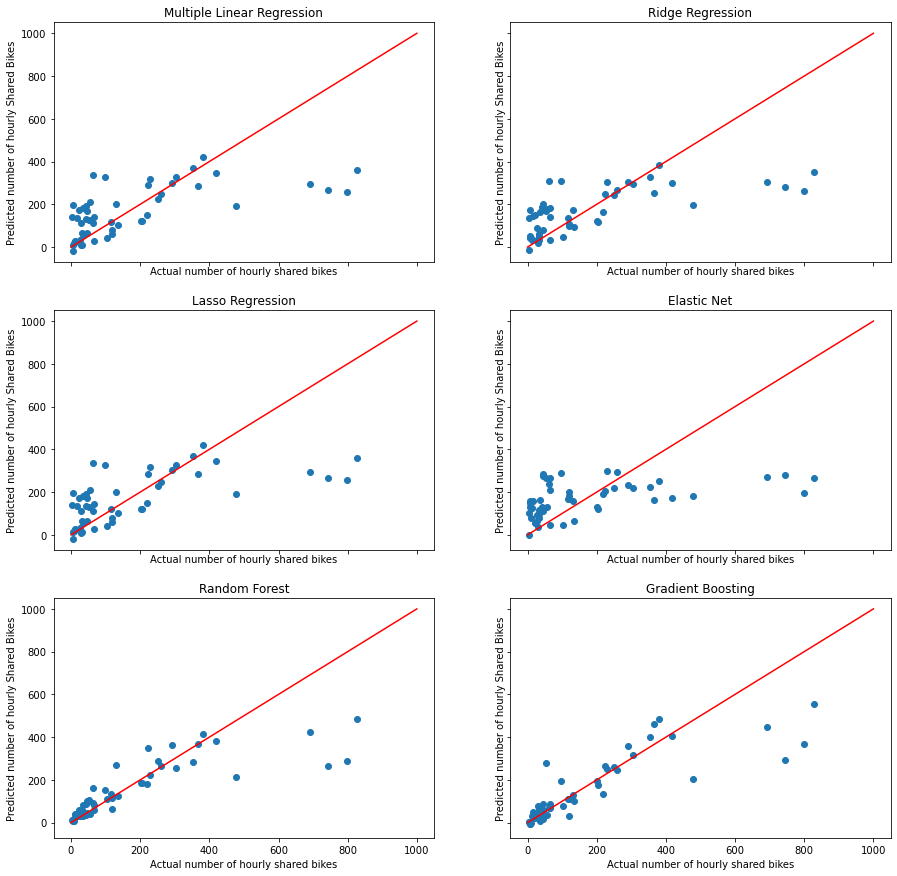

In [75]:
#RMSE and R2 check for different models event scale
hour = pd.read_csv('hr_event.csv')
y = np.array(hour.cnt)
#Drop unnecessary variables
hour.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X = hour.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)
reg = LinearRegression().fit(X_train, y_train)
y_pred_lin = reg.predict(X_test)
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred_ridge = clf.predict(X_test)
cld = linear_model.Lasso(alpha=0.1)
cld.fit(X_train, y_train)
y_pred_lasso = cld.predict(X_test)
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred_elast = regr.predict(X_test)
GBDT = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=6608)
GBDT.fit(X_train, y_train)
y_pred_GBDT = GBDT.predict(X_test)
forest = RandomForestRegressor(n_estimators=100,max_depth=6, random_state=6608)
forest.fit(X_train, y_train)
y_pred_RF = forest.predict(X_test)
fig, axs = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True,figsize=(15, 15))
axs[0,0].scatter(y_test,y_pred_lin)
x_45 = [0,1000]
y_45 = [0,1000]
axs[0, 0].plot(x_45,y_45,'r');
axs[0, 0].set_title('Multiple Linear Regression')
axs[0, 1].scatter(y_test,y_pred_ridge)
axs[0, 1].plot(x_45,y_45,'r');
axs[0, 1].set_title('Ridge Regression')
axs[1, 0].scatter(y_test,y_pred_lasso)
axs[1, 0].plot(x_45,y_45,'r');
axs[1, 0].set_title('Lasso Regression')
axs[1, 1].scatter(y_test, y_pred_elast)
axs[1, 1].plot(x_45,y_45,'r');
axs[1, 1].set_title('Elastic Net')
axs[2, 0].scatter(y_test, y_pred_RF)
axs[2, 0].plot(x_45,y_45,'r');
axs[2, 0].set_title('Random Forest')
axs[2, 1].plot(x_45,y_45,'r');
axs[2, 1].scatter(y_test, y_pred_GBDT)
axs[2, 1].set_title('Gradient Boosting')

for ax in axs.flat:
    ax.set(xlabel='Actual number of hourly shared bikes', ylabel='Predicted number of hourly Shared Bikes')